In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Задание 1.
##### Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

##### Itercept on

$$b = \frac{\bar{yx} − \bar{y} \cdot \bar{x}}{\bar{x^2}−(\bar{x})^2}$$  
$$a = \bar{y} − b \cdot \bar{x}$$

In [3]:
x = zp
y = ks
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
y_ab = a + b*x

In [4]:
print('Коэффициент a (intercept) =', a)
print('Коэффициент b =', b)

Коэффициент a (intercept) = 444.1773573243596
Коэффициент b = 2.620538882402765


##### Itercept off

$$a = \bar{y} − b \cdot \bar{x} = 0 => b = \frac{\bar{y}}{\bar{x}}$$

In [5]:
b0 = np.mean(y) / np.mean(x)
y_b = b0*x

In [6]:
print('Коэффициент b =', b0)

Коэффициент b = 7.000986193293885


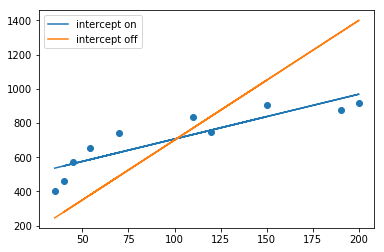

In [7]:
plt.scatter(zp, ks)
plt.plot(x, y_ab, label='intercept on')
plt.plot(x, y_b, label='intercept off')
plt.legend(loc='upper left')

#### Задание 2.
##### Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [8]:
alpha = 1e-6
w1 = 0.1
n = 10
iter_num = 10000

In [9]:
def mse_(w1, n=10):
    return np.sum((w1*x - y)**2)/n

In [10]:
for i in range(iter_num):
    w1 -= alpha * (2 / n) * np.sum((w1 * x - y) * x)
    if i % (iter_num / 10) == 0:
        print('Итерация: {i}; w1 = {w1:.5f}; mse = {mse:.5f}'.format(i=i, w1=w1, mse=mse_(w1)))

Итерация: 0; w1 = 0.25953; mse = 493237.72125
Итерация: 1000; w1 = 5.88982; mse = 56516.85842
Итерация: 2000; w1 = 5.88982; mse = 56516.85842
Итерация: 3000; w1 = 5.88982; mse = 56516.85842
Итерация: 4000; w1 = 5.88982; mse = 56516.85842
Итерация: 5000; w1 = 5.88982; mse = 56516.85842
Итерация: 6000; w1 = 5.88982; mse = 56516.85842
Итерация: 7000; w1 = 5.88982; mse = 56516.85842
Итерация: 8000; w1 = 5.88982; mse = 56516.85842
Итерация: 9000; w1 = 5.88982; mse = 56516.85842


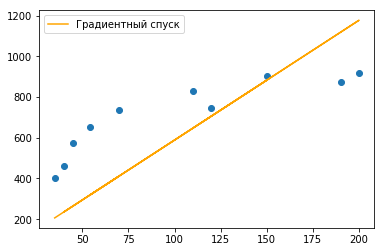

In [11]:
plt.scatter(zp, ks)
plt.plot(x, w1*x, 'orange', label='Градиентный спуск')
plt.legend(loc='upper left')

#### Задание 3.
##### В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

При (n) > 100, таблицы распределения Стьюдента дают теже результаты, что и таблицы функции вероятностей Лапласа,
при 30 < (n) < 100 различия незначительны. Поэтому практически к малым выборкам относят выборки объемом менее 30 единиц (безусловно, большой считается выборка с объемом более 100 единиц).

#### Задание 4.
##### Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).